# Slope

## Import Library

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

## Import dataset

In [4]:
path = "C:/Users/julia/Desktop/Yanjun/Data (Archive)/slope_data - Copy.csv"
slope = pd.read_csv(path)
slope

,Foam Time [s],Foam Volume [ml],Flow Time [s],Flow [ml/min],Temperature Time [s],Temperature [degC],experiment_id
0,3.028,11.136275,0.000,-4.019005,0.000,17.538681,polysorbate 60 day 12 110f
1,4.028,11.136275,0.000,-3.985373,1.028,20.551097,polysorbate 60 day 12 110f
2,5.028,10.022647,0.000,-4.119899,2.029,20.559375,polysorbate 60 day 12 110f
3,6.028,11.693088,0.000,-3.992099,3.028,20.526264,polysorbate 60 day 12 110f
4,7.028,11.136275,0.000,-3.790311,4.028,20.501433,polysorbate 60 day 12 110f
...,...,...,...,...,...,...,...
517,NaN,NaN,509.106,-3.709595,NaN,NaN,polysorbate 60 day 12 110f
518,NaN,NaN,510.106,-3.776858,NaN,NaN,polysorbate 60 day 12 110f
519,NaN,NaN,511.106,-3.797037,NaN,NaN,polysorbate 60 day 12 110f
520,NaN,NaN,512.106,-3.978647,NaN,NaN,polysorbate 60 day 12 110f


In [9]:
px.line(slope, x = 'Foam Time [s]', y = 'Foam Volume [ml]')

In [18]:
px.scatter(slope, x = 'Foam Time [s]', y = 'Foam Volume [ml]')

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

In [73]:
poly = PolynomialFeatures(degree= 10)
x = slope['Foam Time [s]'].to_numpy()
x = x[~np.isnan(x)].reshape(-1,1)
poly_variable = poly.fit_transform(x)
poly_variable

array([[1.00000000e+00, 3.02800000e+00, 9.16878400e+00, ...,
        7.06719324e+03, 2.13994611e+04, 6.47975683e+04],
       [1.00000000e+00, 4.02800000e+00, 1.62247840e+01, ...,
        6.92972013e+04, 2.79129127e+05, 1.12433212e+06],
       [1.00000000e+00, 5.02800000e+00, 2.52807840e+01, ...,
        4.08471869e+05, 2.05379656e+06, 1.03264891e+07],
       ...,
       [1.00000000e+00, 5.11106000e+02, 2.61229343e+05, ...,
        4.65680266e+21, 2.38011978e+24, 1.21649350e+27],
       [1.00000000e+00, 5.12106000e+02, 2.62252555e+05, ...,
        4.73019357e+21, 2.42236051e+24, 1.24050535e+27],
       [1.00000000e+00, 5.13106000e+02, 2.63277767e+05, ...,
        4.80459456e+21, 2.46526629e+24, 1.26494293e+27]])

In [74]:
y = slope['Foam Volume [ml]'].dropna()
lr = LinearRegression()
model = lr.fit(X = poly_variable, y = y)
y_predict = model.predict(X = poly_variable)


In [75]:
slope1 = slope.dropna()

In [76]:
slope1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511 entries, 0 to 510
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Foam Time [s]         511 non-null    float64
 1   Foam Volume [ml]      511 non-null    float64
 2   Flow Time [s]         511 non-null    float64
 3   Flow [ml/min]         511 non-null    float64
 4   Temperature Time [s]  511 non-null    float64
 5   Temperature [degC]    511 non-null    float64
 6   experiment_id         511 non-null    object 
dtypes: float64(6), object(1)
memory usage: 31.9+ KB


In [77]:
y_predict = pd.Series(y_predict)

In [78]:
slope2 = pd.concat((slope1, y_predict), axis=1)
slope2.columns

Index([       'Foam Time [s]',     'Foam Volume [ml]',        'Flow Time [s]',
              'Flow [ml/min]', 'Temperature Time [s]',   'Temperature [degC]',
              'experiment_id',                      0],
      dtype='object')

In [79]:
model.score(poly_variable, y)

0.9231168540966926

<Axes: xlabel='Foam Time [s]', ylabel='Foam Volume [ml]'>

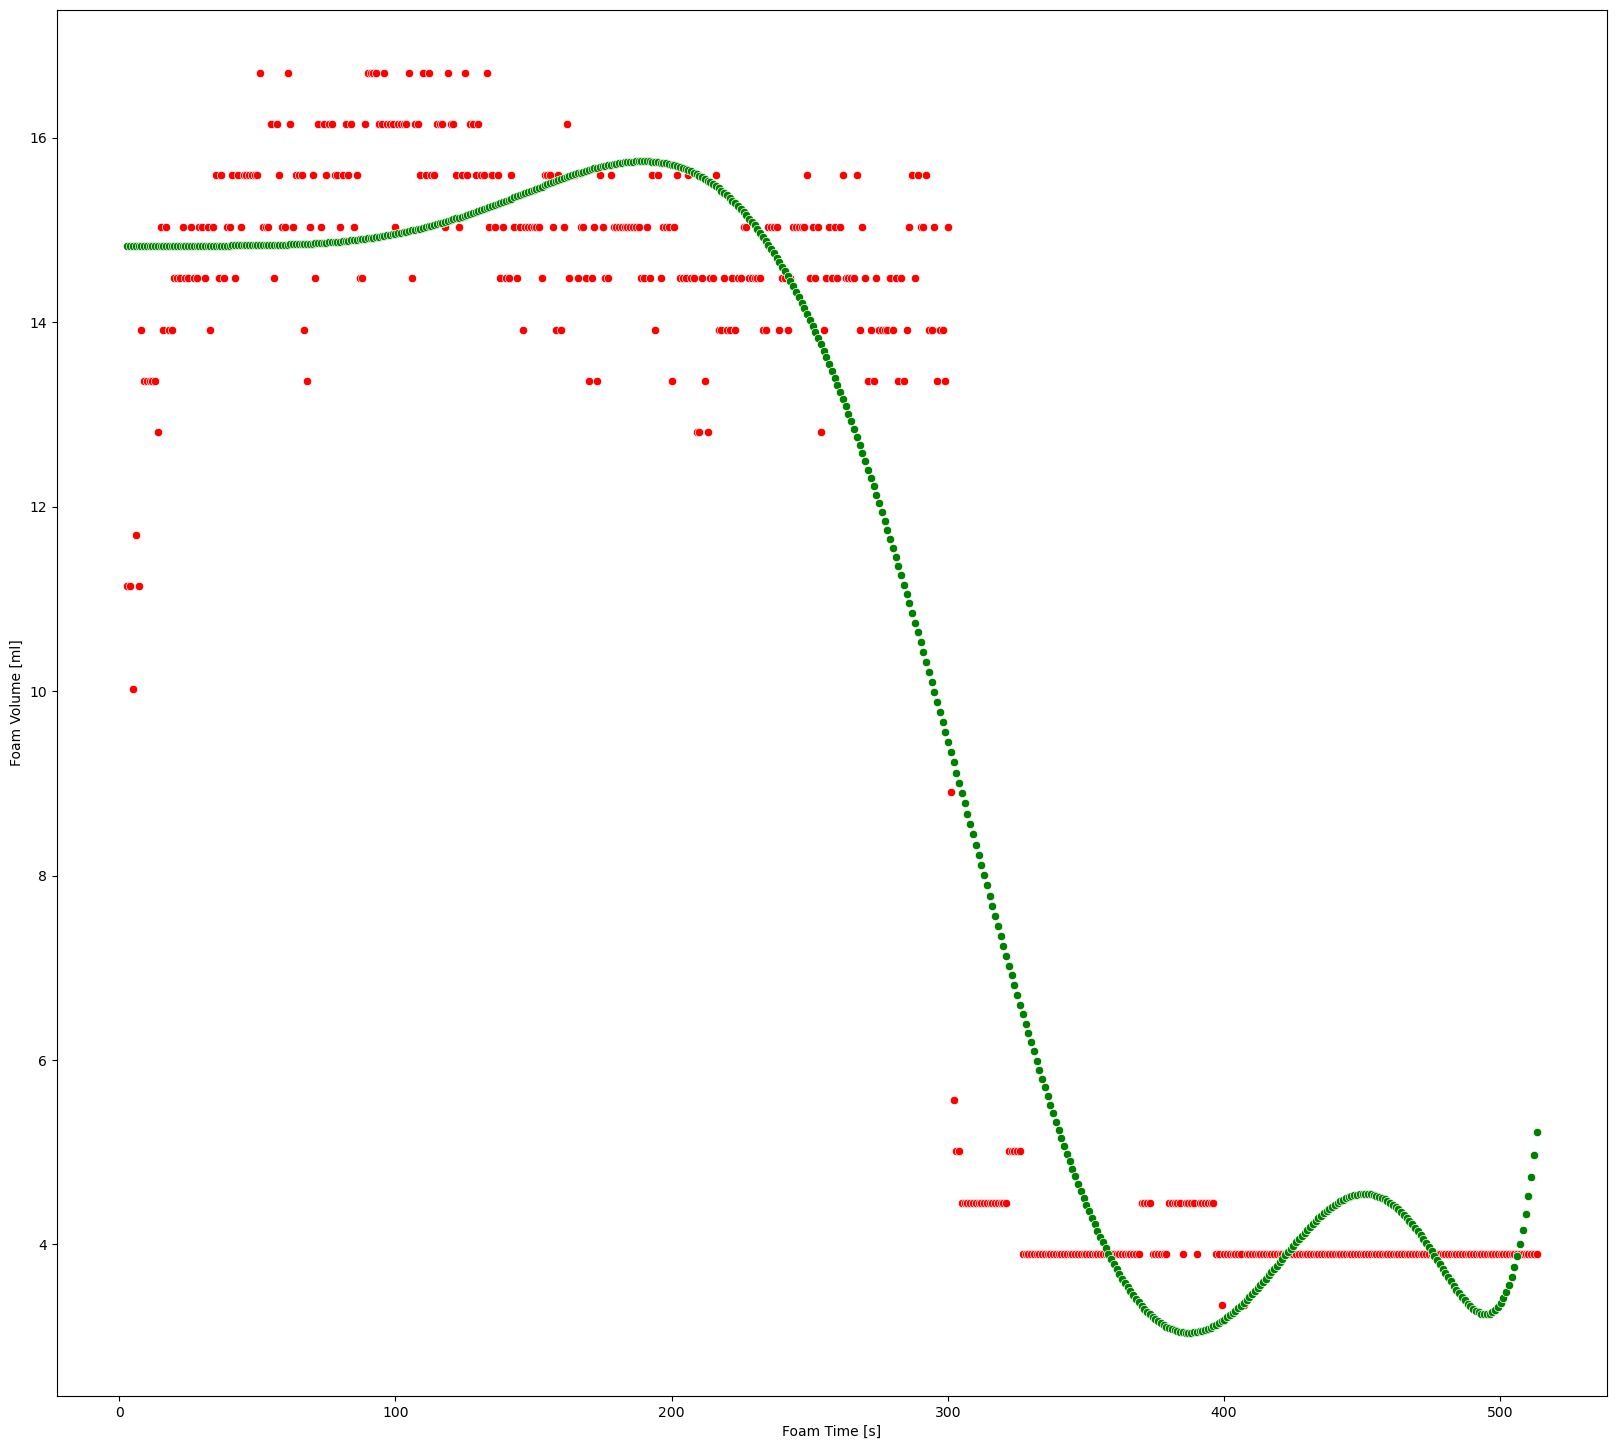

In [81]:
fig, axes = plt.subplots(figsize = (20,18))
sns.scatterplot(slope2, x = 'Foam Time [s]', y = 'Foam Volume [ml]', color = 'red' )
sns.scatterplot(slope2, x = 'Foam Time [s]', y = 0, color = 'green' )

In [ ]:
# find the outlier 
# using z-score to find outlier

